In [1]:
import pandas as pd
df = pd.read_parquet("GUIDE_train_Feature_engineered_2.parquet")

In [2]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['IncidentGrade'])
y = df['IncidentGrade']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define a grid of hyperparameters
param_grid = {
    'n_estimators': [75, 125],
    'max_depth': [None],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the model
y_pred = grid_search.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Calculate ROC-AUC for each class
y_prob = grid_search.predict_proba(X_test)
roc_aucs = {}
for i in range(y_prob.shape[1]):
    roc_aucs[i] = roc_auc_score(y_test == i, y_prob[:, i])
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_aucs[i]:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('ROC Curves for Random Forest')
plt.show()

# Cross-validation scores
cv_scores = grid_search.cv_results_['mean_test_score']
print(f'Cross-validation scores: {cv_scores}')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


MemoryError: Unable to allocate 344. MiB for an array with shape (16, 2819124) and data type int64

c:\Users\Faster\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.2s
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Accuracy: 0.8370916607357514
              precision    recall  f1-score   support

           0       0.81      0.88      0.85    783090
           1       0.84      0.80      0.82    783091
           2       0.86      0.82

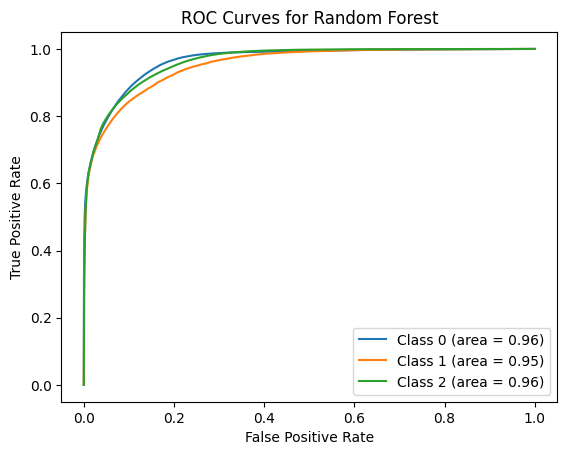

Cross-validation scores: [0.82759208 0.83080158]


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Downsample the data
X_train_small = X_train.sample(frac=0.1, random_state=42)
y_train_small = y_train.loc[X_train_small.index]

# Ensure data is numeric (convert non-numeric columns if necessary)
X_train_small = X_train_small.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42, max_samples=0.1)

# Define a reduced grid of hyperparameters
param_grid = {
    'n_estimators': [25, 50],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Perform randomized search with fewer parameter combinations
randomized_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=5, cv=3, n_jobs=1, verbose=2)
randomized_search.fit(X_train_small, y_train_small)

# Best parameters
print(f"Best Parameters: {randomized_search.best_params_}")

# Evaluate the model
y_pred = randomized_search.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Calculate ROC-AUC for each class
y_prob = randomized_search.predict_proba(X_test)
roc_aucs = {}
for i in range(y_prob.shape[1]):
    roc_aucs[i] = roc_auc_score(y_test == i, y_prob[:, i])
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_aucs[i]:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.title('ROC Curves for Random Forest')
plt.show()

# Cross-validation scores
cv_scores = randomized_search.cv_results_['mean_test_score']
print(f'Cross-validation scores: {cv_scores}')


In [17]:
import pickle

# Specify the filename for the model
filename = 'randomized_search_parameters.pkl'

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(randomized_search.best_params_, file)

print(f"Model saved as {filename}")

Model saved as randomized_search_parameters.pkl
